In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

import os
from pathlib import Path

from hypers import weight_hypers
from hypers import alpha_hypers 

from experiment import Params
from experiment import run_experiments
from experiment import load_experiments
from experiment import draw_regrets
from experiment import experiments_to_df

### Эксперимент

In [2]:
filepath = '../results/experiment_uni2-0.json'

seeds = 5 * np.arange(2, 5) + 111

params = Params(series_type = "default",
                from_start = False,
                a = -40,
                b = 40,
                dim = 10,
                low = -10,
                high = 10,
                clip = (-40, 40),
                workers_num = 3,
                length = 2000,
                lower_bound = 100,
                upper_bound = 400,
                alternating=True)

different_noises = [1]
different_windows = [10, 20, 50]
different_wf = ["default", "simple_101", "simple_2", "diverge_05", "const"]
different_af = ["default", "simple_05", "simple_15", "shift_100", "const_1100"]


interesting = set()

for key_w in different_wf:
    interesting.add((key_w, "default"))

for key_a in different_af:
    interesting.add(("simple_101", key_a))


experiments, df = run_experiments(filepath, seeds, params, different_noises, different_windows, interesting, "uniform past")
# experiments, df = load_experiments(filepath)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2703/2703 [01:15<00:00, 35.86it/s]


In [3]:
# experiment

In [4]:
experiments0, df0 = load_experiments('../results/experiment_2-0.json')
experiments1, df1 = load_experiments('../results/experiment_2-1.json')
experiments2, df2 = load_experiments('../results/experiment_2-2.json')
experiments3, df3 = load_experiments('../results/experiment_2-3.json')
experiments4, df4 = load_experiments('../results/experiment_2-4.json')
df_b = experiments_to_df(experiments0 + experiments1 + experiments2 + experiments3 + experiments4)

In [5]:
os.stat(filepath).st_size

12455588

In [6]:
# df0[(df0["train_window"] == 10) & (df0["alpha_function"] == alpha_hypers["default"].repr)]

In [22]:
df

,noise_var,train_window,weight_function,alpha_function,regret,random_0,random_1,random_2
6,1,10,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),81029.12,93914.79,64401.08,84771.5
7,1,10,1 / (x^1.01),1 / (x + 100),78537.71,90842.51,62653.26,82117.37
3,1,10,1 / (x^1.01),1 / 100,80912.33,88037.3,70517.3,84182.4
2,1,10,1 / (x^1.01),1 / (x + 1),78245.20,90463.18,62438.93,81833.49
4,1,10,1 / (x^1.01),1 / (x + 1)^0.5,109123.77,111559.94,101029.49,114781.89
8,1,10,1 / (x^1.01),1 / (x + 1)^1.5,96935.18,114737.39,74998.72,101069.42
0,1,10,1 / (x^2),1 / (x + 1),90833.13,103030.8,76581.3,92887.3
1,1,10,1 / c,1 / (x + 1),87712.72,101690.21,70073.08,91374.87
5,1,10,1 / (x^0.5),1 / (x + 1),81337.05,94075.5,65364.55,84571.11
15,1,20,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),100616.64,114252.8,81385.06,106212.06


In [7]:
df[df["train_window"] == 10]

,noise_var,train_window,weight_function,alpha_function,regret,random_0,random_1,random_2
6,1,10,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),81029.12,93914.79,64401.08,84771.5
7,1,10,1 / (x^1.01),1 / (x + 100),78537.71,90842.51,62653.26,82117.37
3,1,10,1 / (x^1.01),1 / 100,80912.33,88037.3,70517.3,84182.4
2,1,10,1 / (x^1.01),1 / (x + 1),78245.20,90463.18,62438.93,81833.49
4,1,10,1 / (x^1.01),1 / (x + 1)^0.5,109123.77,111559.94,101029.49,114781.89
8,1,10,1 / (x^1.01),1 / (x + 1)^1.5,96935.18,114737.39,74998.72,101069.42
0,1,10,1 / (x^2),1 / (x + 1),90833.13,103030.8,76581.3,92887.3
1,1,10,1 / c,1 / (x + 1),87712.72,101690.21,70073.08,91374.87
5,1,10,1 / (x^0.5),1 / (x + 1),81337.05,94075.5,65364.55,84571.11


In [8]:
df_b[(df_b["train_window"] == 10) & (df_b["alpha_function"] == alpha_hypers["default"].repr)]

,noise_var,train_window,weight_function,alpha_function,regret,random_0,random_1,random_2
15,1,10,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),136360.61,154356.86,108887.47,145837.51
20,1,10,1 / (x^1.01),1 / (x + 1),94758.81,106113.72,77114.55,101048.15
12,1,10,1 / (x^1.1),1 / (x + 1),98359.26,110153.6,79454.07,105470.12
21,1,10,1 / (x^2),1 / (x + 1),113298.39,130525.24,88559.76,120810.16
19,1,10,1 / e^(x/4),1 / (x + 1),425358.37,337358.16,484331.57,454385.39
13,1,10,1 / ((x + 4) * ln(x + 4) * (ln(ln(x + 4)))^2,1 / (x + 1),127634.11,141446.96,103613.84,137841.54
71,1,10,1 / c,1 / (x + 1),83776.19,97360.8,66377.54,87590.24
96,1,10,1 / x,1 / (x + 1),94335.48,105639.86,76828.6,100537.99
97,1,10,1 / (x^0.1),1 / (x + 1),80113.94,93108.87,63775.73,83457.23
99,1,10,1 / (x^0.2),1 / (x + 1),78586.83,91288.29,62722.55,81749.66


In [9]:
interesting = ['const', 'diverge_01', 'diverge_02', 'diverge_05', 'diverge_08', 'diverge_09', 'simple_101', 'default']
mask = np.array([False] * len(df))
for t in interesting:
    mask |= (df["weight_function"] == weight_hypers[t].repr)
mask &= (df["alpha_function"] == alpha_hypers["default"].repr)
mask &= (df['train_window'] == 10)

In [10]:
df[mask].iloc[:, :5]

,noise_var,train_window,weight_function,alpha_function,regret
6,1,10,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),81029.12
2,1,10,1 / (x^1.01),1 / (x + 1),78245.20
1,1,10,1 / c,1 / (x + 1),87712.72
5,1,10,1 / (x^0.5),1 / (x + 1),81337.05


In [11]:
df_w = df[(df["alpha_function"] == alpha_hypers["default"].repr) & (df["train_window"] == 10)].iloc[:6,2:5]
print(df_w.to_latex(float_format="%.2f"))

\begin{tabular}{lllr}
\toprule
 & weight_function & alpha_function & regret \\
\midrule
6 & 1 / ((x + 1) * (ln(x + 1))^2) & 1 / (x + 1) & 81029.12 \\
2 & 1 / (x^1.01) & 1 / (x + 1) & 78245.20 \\
0 & 1 / (x^2) & 1 / (x + 1) & 90833.13 \\
1 & 1 / c & 1 / (x + 1) & 87712.72 \\
5 & 1 / (x^0.5) & 1 / (x + 1) & 81337.05 \\
\bottomrule
\end{tabular}



In [12]:
# regret_simple = df[(df["weight_function"] == weight_hypers["simple_101"].repr) & (df["alpha_function"] == alpha_hypers["default"].repr)].iloc[:,4].values
# regret_const = df[df["weight_function"] == weight_hypers["const"].repr].iloc[:,4].values
# regret_slow = df[df["weight_function"] == weight_hypers["slow"].repr].iloc[:,4].values
# table = df[df["weight_function"] == weight_hypers["default"].repr].iloc[:,:5]
# table = table.drop(["weight_function", "noise_var"], axis=1).rename(columns={"regret": "default weight func regret"}).set_index("train_window", drop=True)
# table["1/x^1.01 weight func regret"] = regret_simple
# table["1/const weight func regret"] = regret_const
# table["slow weight func regret"] = regret_slow
# table
# print(table.to_latex(float_format="%.2f"))

In [13]:
df_r = df[(df["weight_function"] == weight_hypers["simple_101"].repr) & ((df["train_window"] == 10))].iloc[:,3:5]
print(df_r.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lr}
\toprule
alpha_function & regret \\
\midrule
1 / (x + 100) & 78537.71 \\
1 / 100 & 80912.33 \\
1 / (x + 1) & 78245.20 \\
1 / (x + 1)^0.5 & 109123.77 \\
1 / (x + 1)^1.5 & 96935.18 \\
\bottomrule
\end{tabular}



In [14]:
df[["noise_var", "train_window", "regret"]].groupby(["noise_var", "train_window"]).mean()

regret
noise_var train_window               
1         10             87185.134444
          20            106439.341111
          50            115235.968889

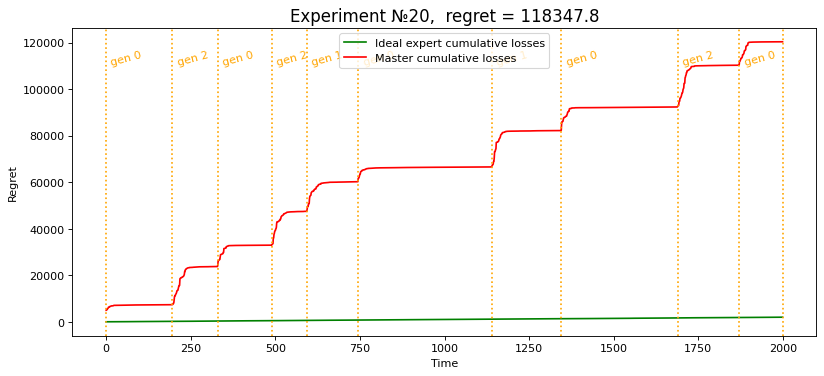

In [15]:
num = 20
experiment = experiments[num]
draw_regrets(experiment.logs, show=["master", "ideal"], title=f"Experiment №{num},  regret = {experiment.regret:.1f}", fig_size=(12, 5))

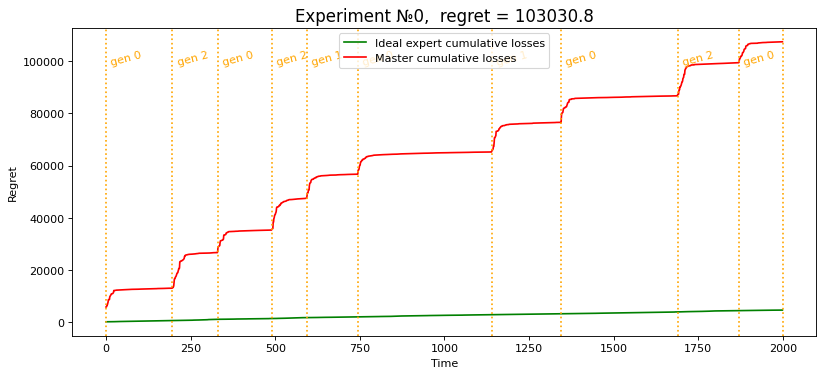

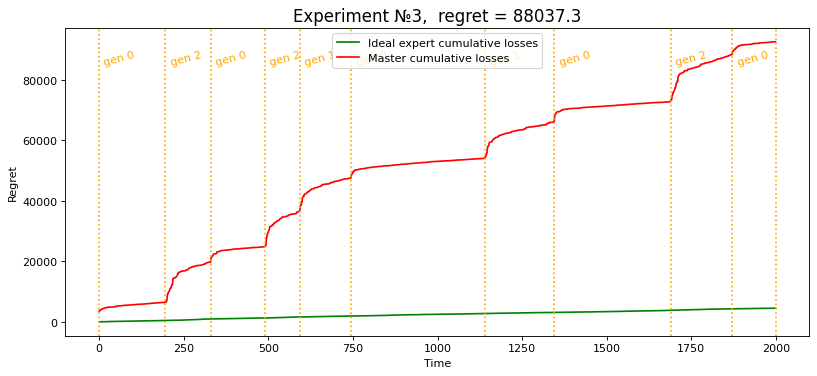

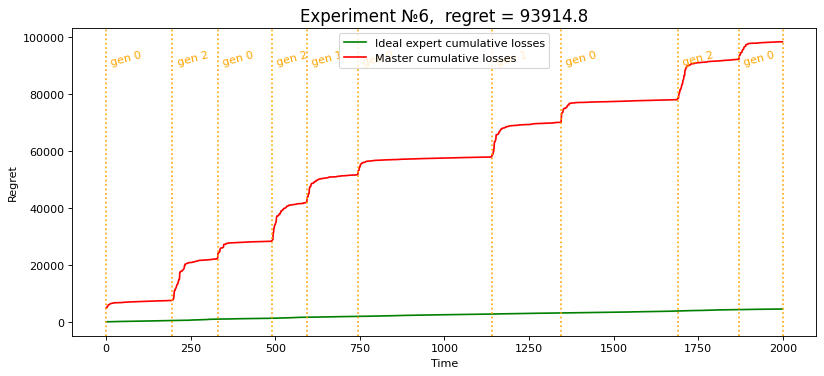

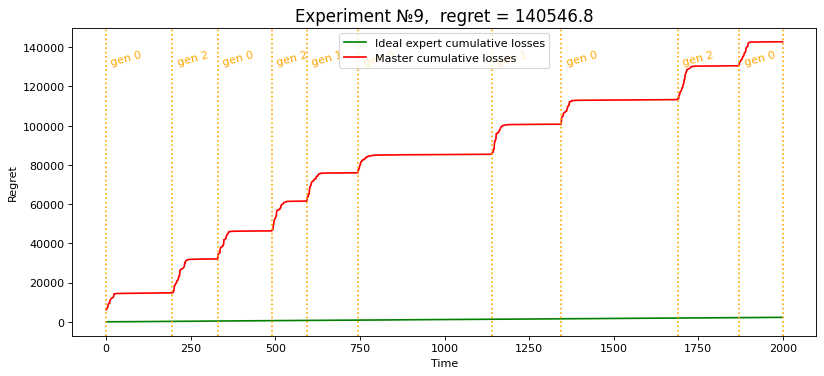

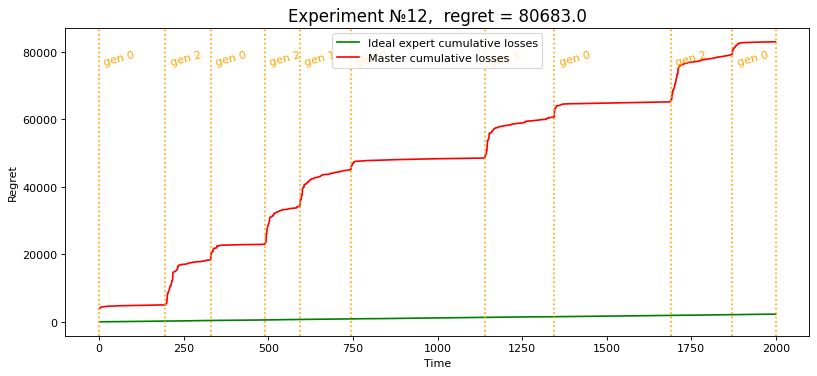

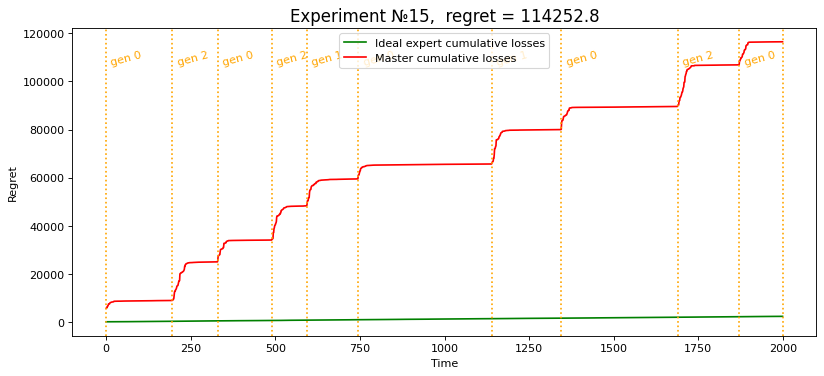

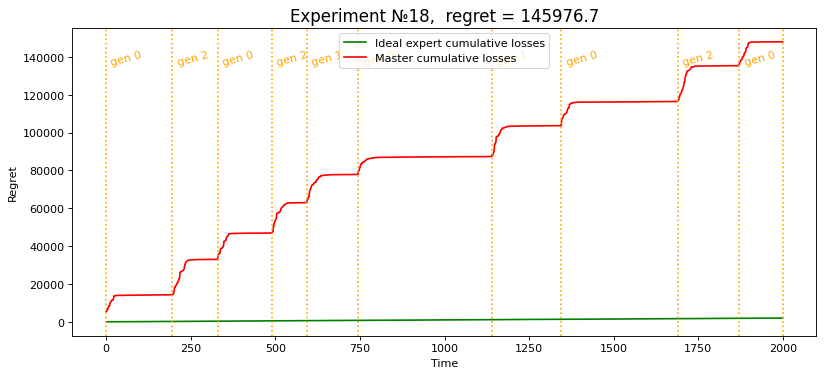

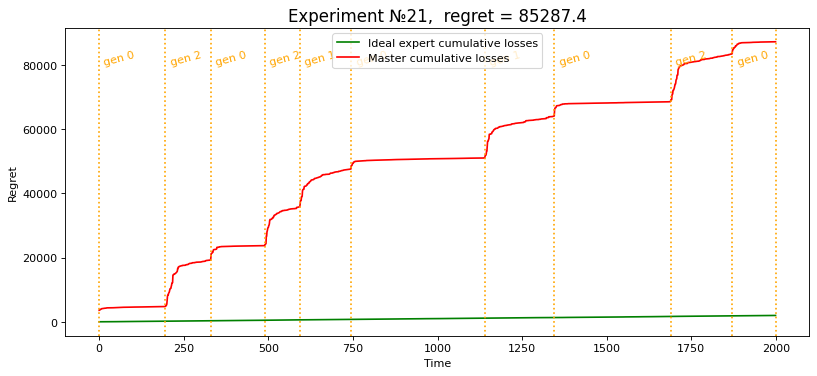

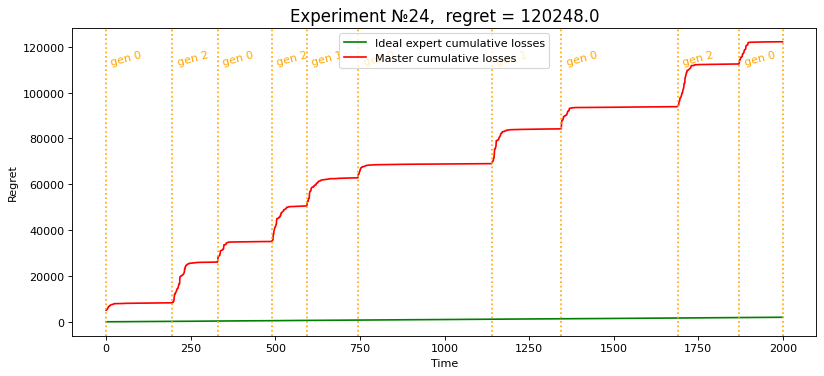

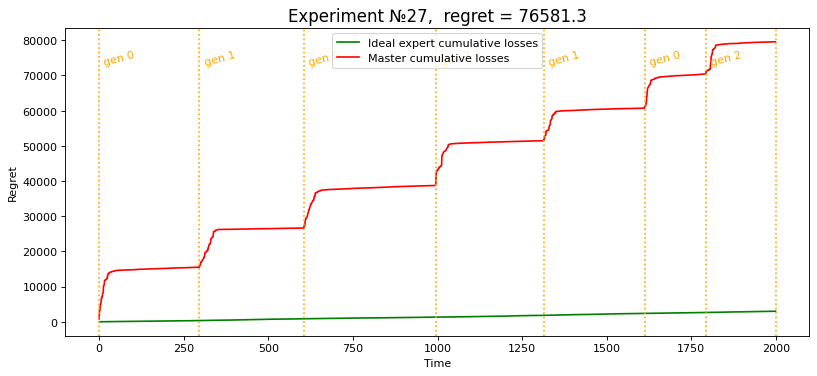

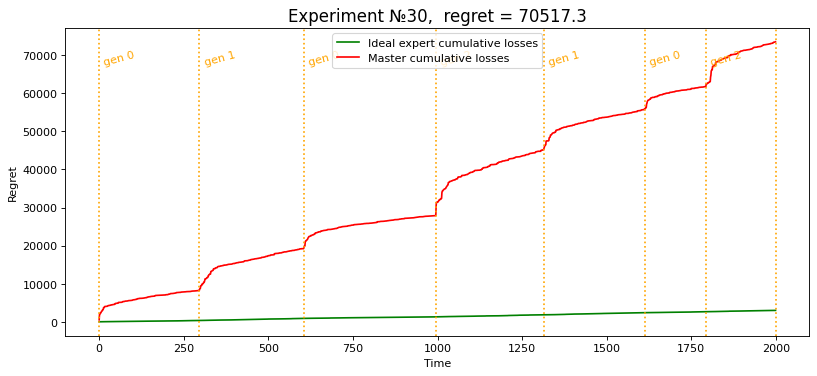

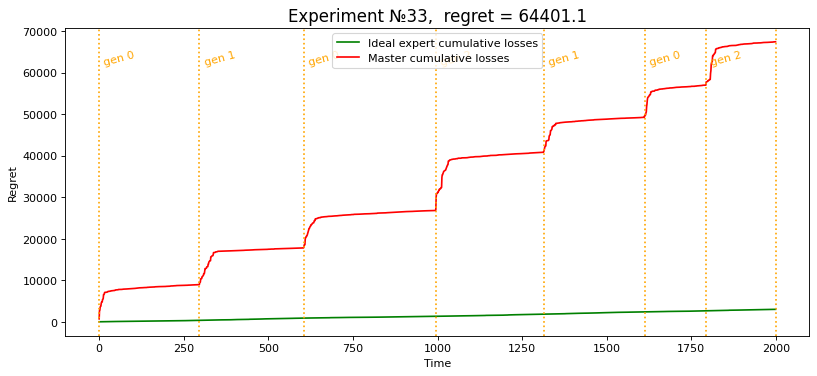

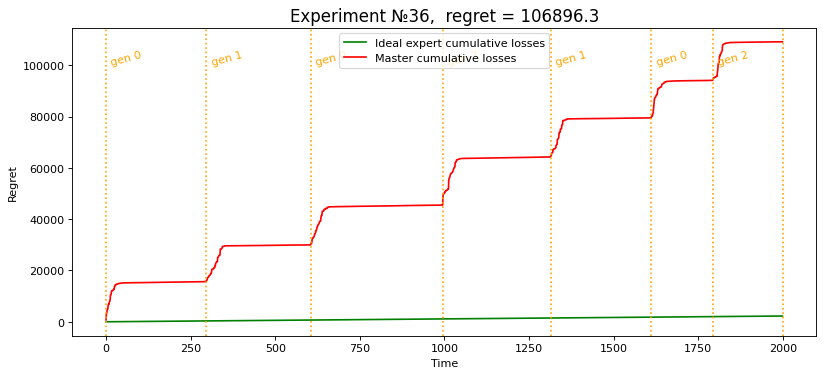

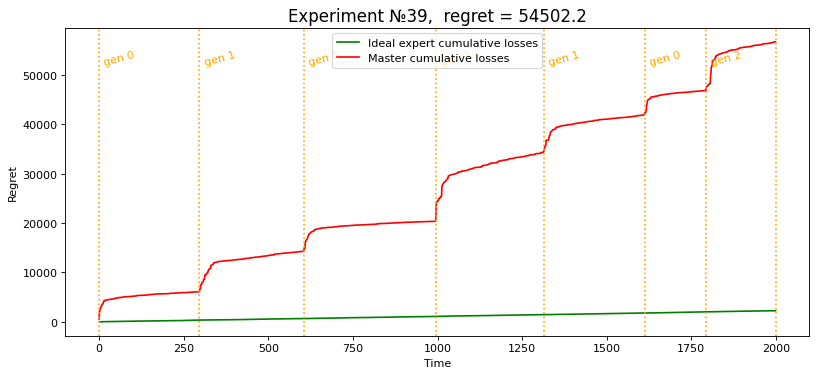

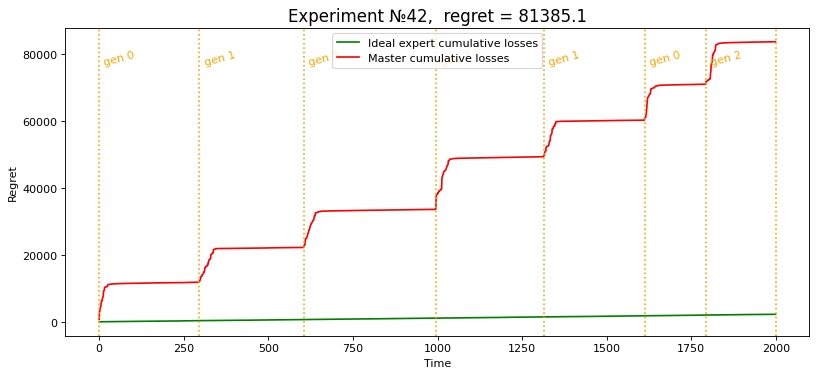

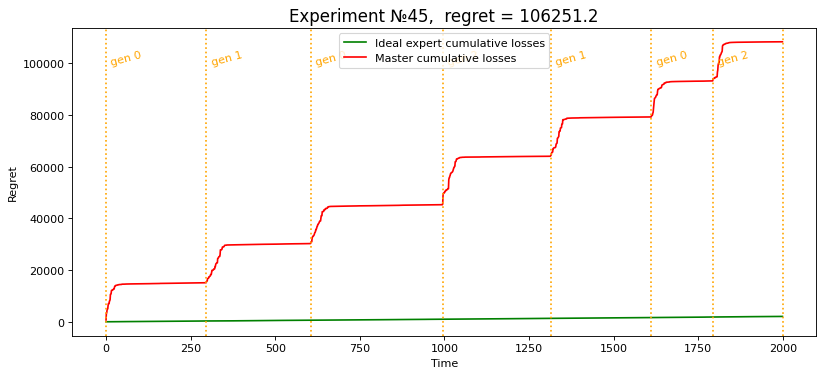

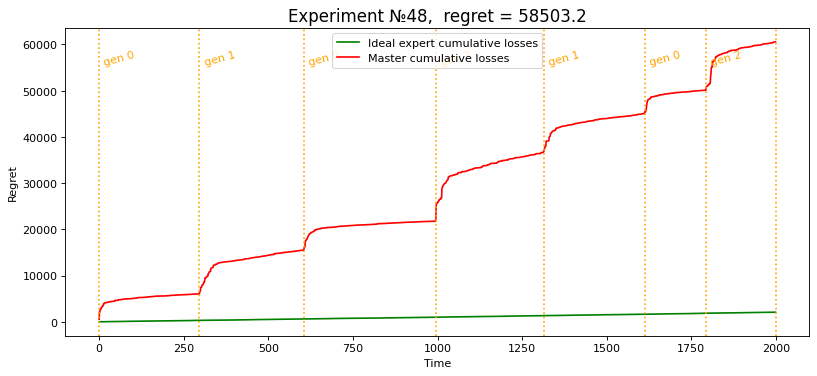

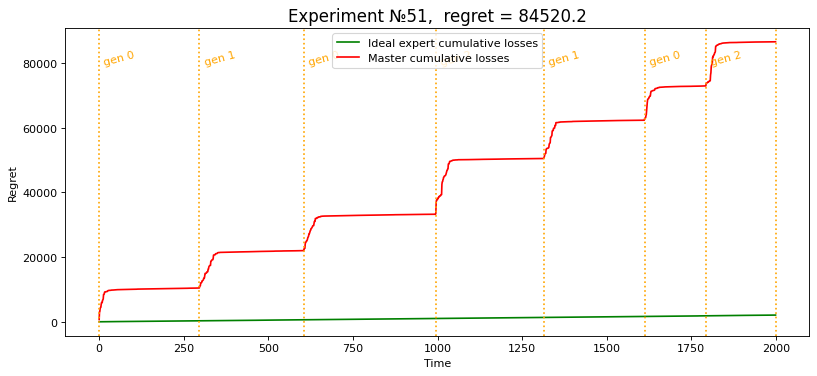

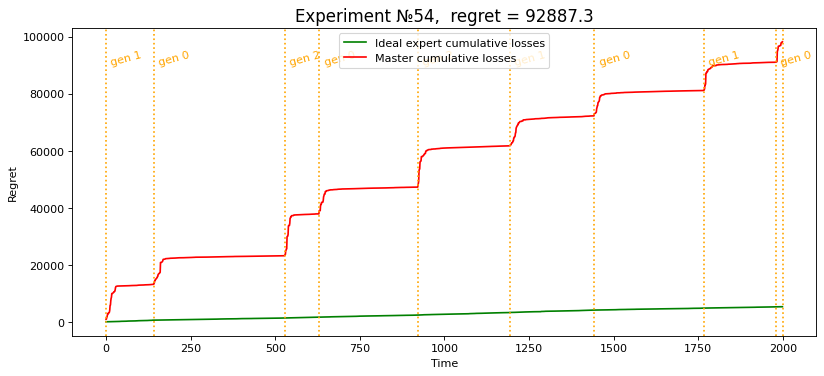

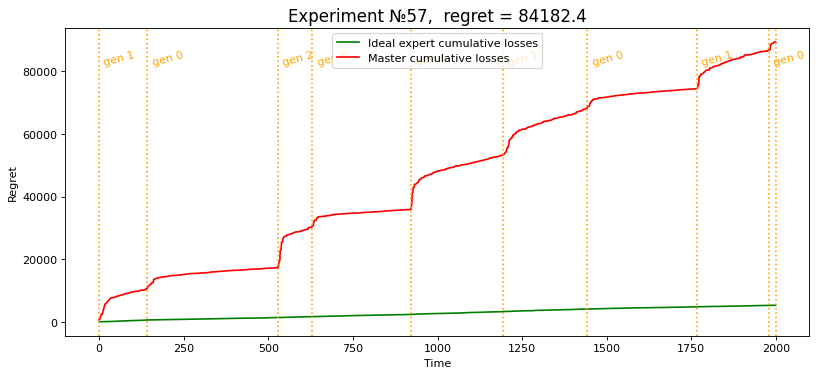

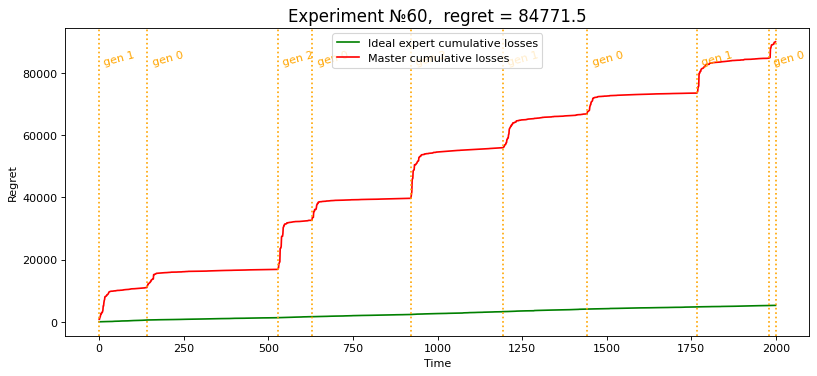

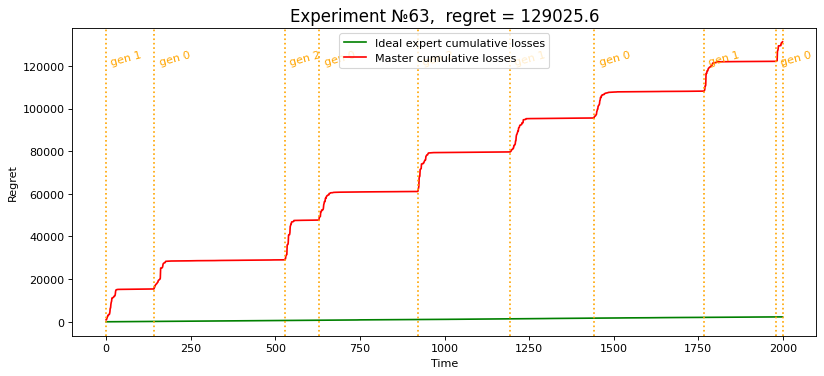

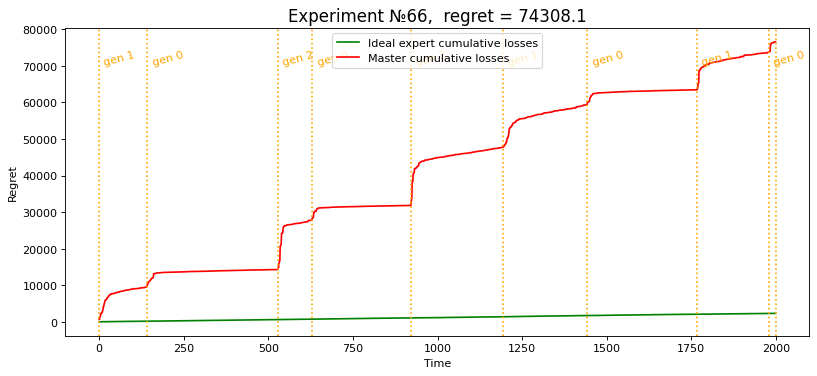

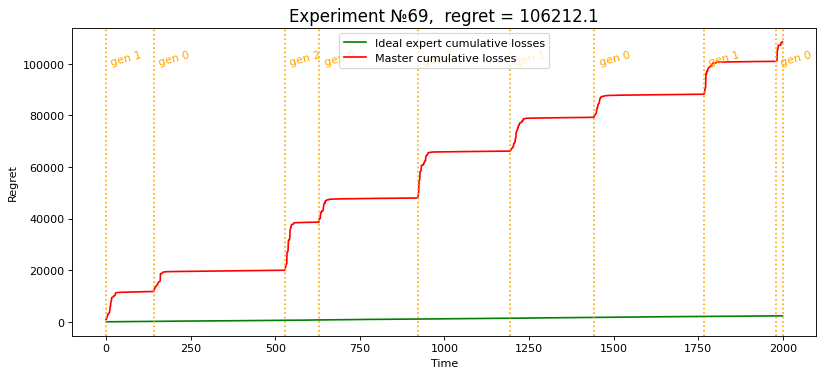

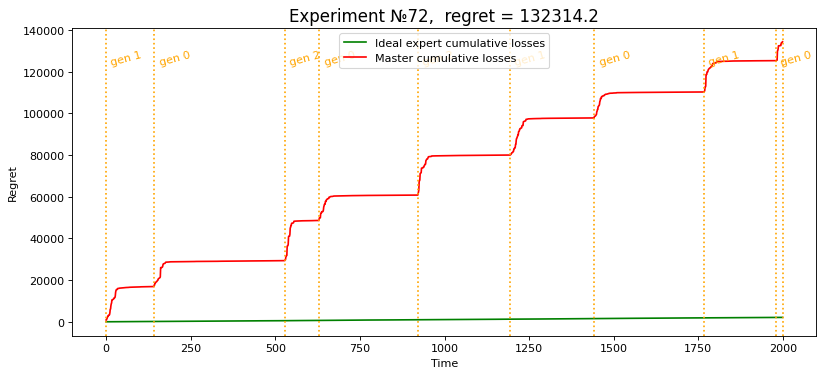

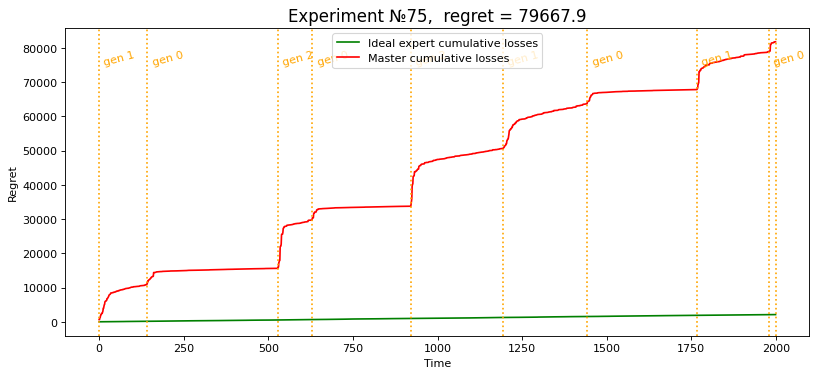

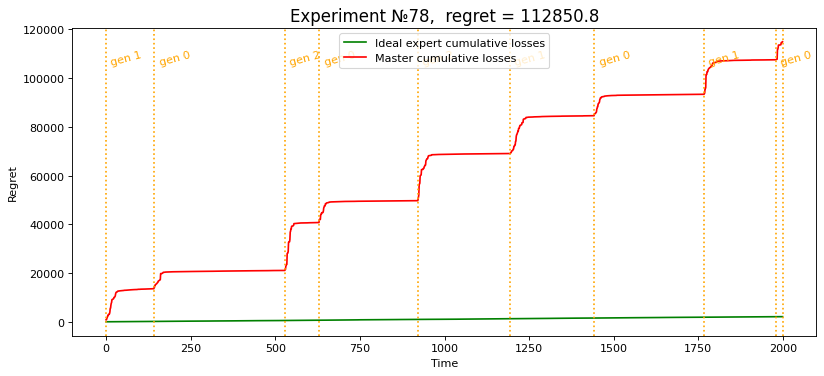

In [16]:
enumerated = [(num, experiment) for num, experiment in enumerate(experiments)]
for num, experiment in enumerated[::3]:
    draw_regrets(experiment.logs, show=["master", "ideal"], title=f"Experiment №{num},  regret = {experiment.regret:.1f}", fig_size=(12, 5))

In [17]:
ex = experiments[7]
ex.random_seed

121

In [18]:
ex.to_dict().keys()

dict_keys(['filepath', 'random_seed', 'key_w', 'key_a', 'train_window', 'noise_var', 'params', 'logs', 'regret'])

In [19]:
ex.key_w, ex.key_a, ex.train_window, ex.params

('simple_101',
 'shift_100',
 10,
 Params(series_type='default', from_start=False, a=-40, b=40, dim=10, low=-10, high=10, clip=(-40, 40), workers_num=3, length=2000, lower_bound=100, upper_bound=400, alternating=True))

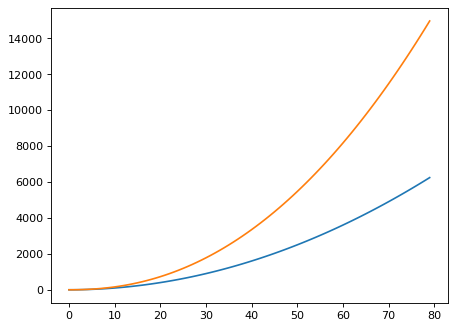

In [20]:
plt.plot(np.arange(80) ** 2, color=None)
plt.plot(np.arange(80) ** 2.2, color=None)